In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import warnings as wa
import pylab as pl

#Importing the "Haberman.csv"data.
hm=pd.read_csv("haberman.csv")


In [4]:
#Cheking how many data points and features are present in the given data frame.
print(hm.shape)   #Data point=306(Rows);Feature =4(Columns)

(306, 4)


In [5]:
#Checking the feature name.
print(hm.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
#Checking how many data points for each class to check the given data set id balaced or imbalance?
hm["status"].value_counts()

#The provided data is imbalanced data set
#1 = 225 (the patient survived 5 years or longer)
#2 = 81 (the patient died within 5 year)

1    225
2     81
Name: status, dtype: int64

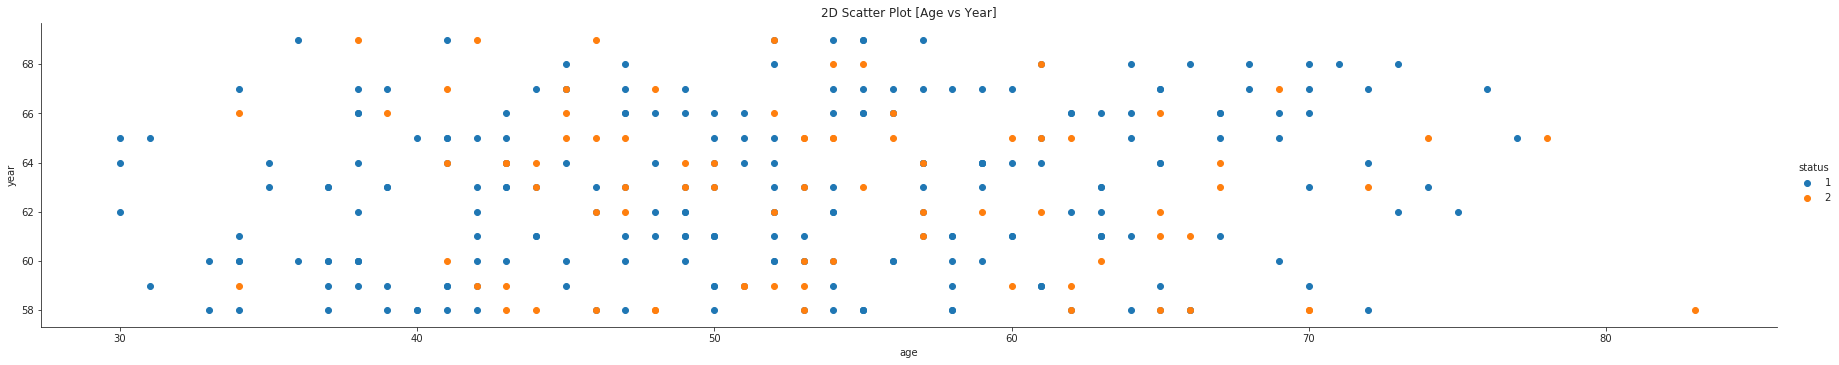

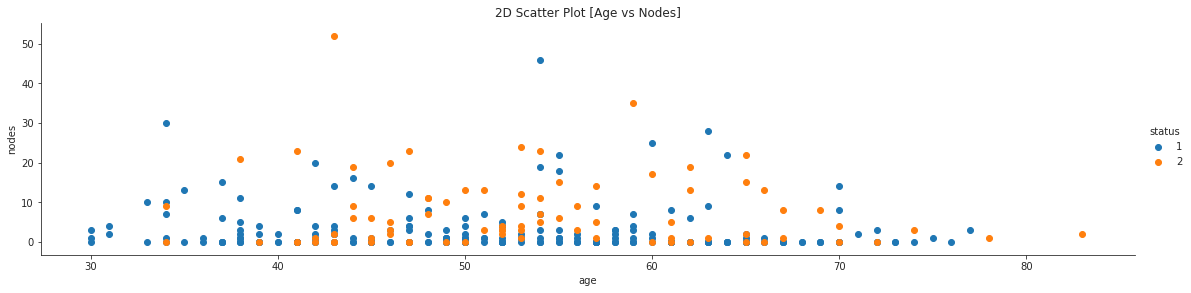

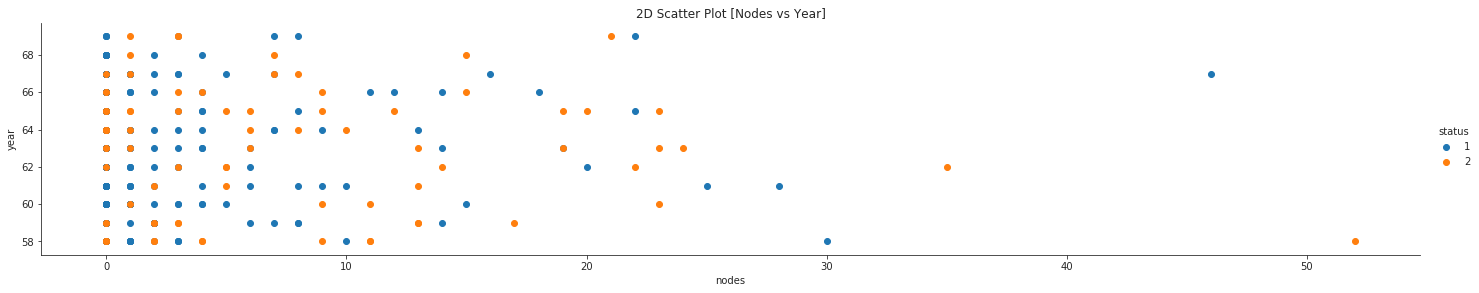

In [7]:
#2D Scatter Plot Age vs Year
sn.set_style("ticks");
sn.FacetGrid(hm, hue="status", height=5, aspect=5).map(plt.scatter,"age","year").add_legend();#We can set a Aspect ratio of the plot by using aspect
plt.title("2D Scatter Plot [Age vs Year]")
plt.show();

#2D Scatter Plot Age vs Node
sn.set_style("ticks");
sn.FacetGrid(hm, hue="status", height=4, aspect=4).map(plt.scatter,"age","nodes").add_legend();
plt.title("2D Scatter Plot [Age vs Nodes]")
plt.show();

#2D Scatter Plot Node vs Year
sn.set_style("ticks");
sn.FacetGrid(hm, hue="status", height=4, aspect=5).map(plt.scatter,"nodes","year").add_legend();
plt.title("2D Scatter Plot [Nodes vs Year]")
plt.show();


Observations:
1. From the above plots Age vs Nodes having more information when compare to other two scatter plots.From Age vs Nodes plots we could see that Patient's can survival if he/she had less node and age is less than 40.

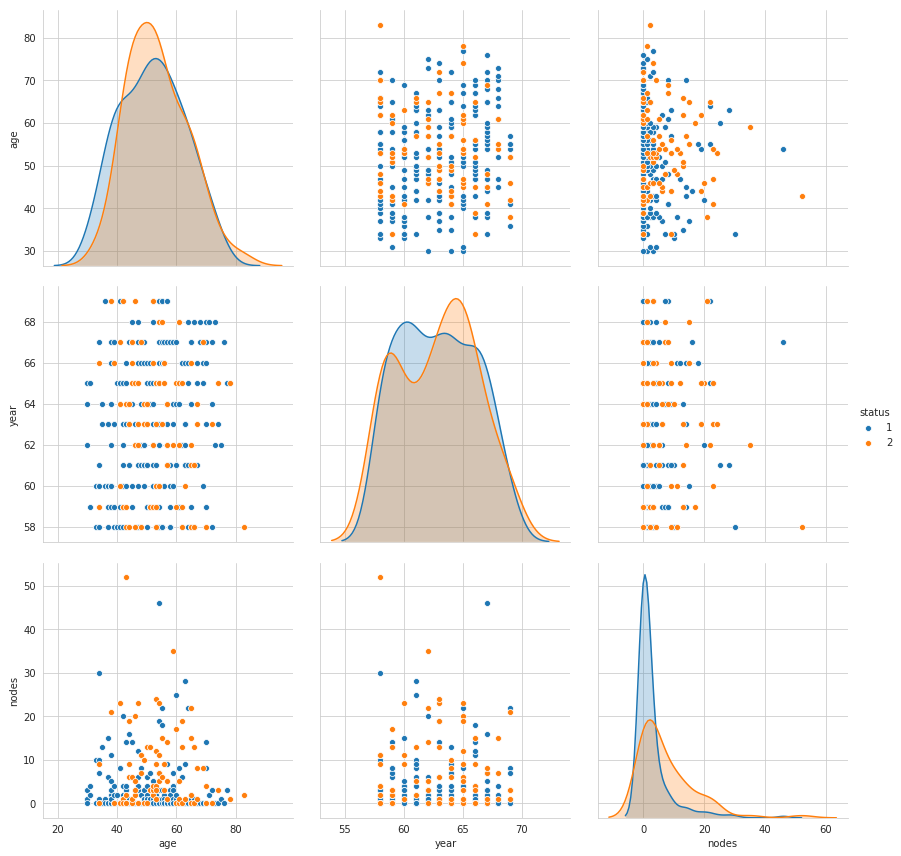

In [35]:
#Pair Plot
#3c2=3 (Total 3 features and we are going to compare the two features at a time.)
plt.close();
sn.set_style("whitegrid");
sn.pairplot(hm, hue="status", vars=['age','year','nodes'], height=4);
plt.show()

Observations:
    1.From the pair plot we confirm that Age vs Nodes gives the more information.
    2.Rest of the plot have lot of overlap.Hence we can't conclude any thing from the other two plots.

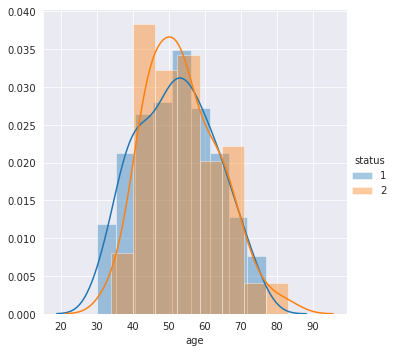

In [8]:
"""PDF - Probablity Density Function"""
plt.close();
wa.filterwarnings("ignore") #imported Warning Library to supress the Warning
sn.set_style("darkgrid");
sn.FacetGrid(hm, hue="status", height=5)\
.map(sn.distplot, 'age')\
.add_legend()
plt.show()

Observation:
    People at the age of 52-23 have more chance of survival rate greater than 5years. 
    People at the age of 50 have very less chance of survival rate greater than 5years.

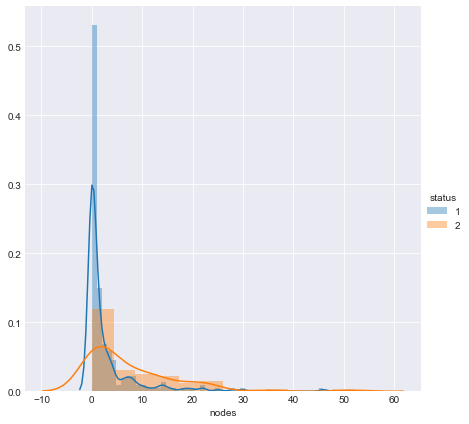

In [27]:
plt.close();
wa.filterwarnings("ignore") #imported Warning Library to supress the Warning
sn.set_style("darkgrid");
sn.FacetGrid(hm, hue="status", height=6)\
.map(sn.distplot, 'nodes')\
.add_legend()
plt.show()

Observation:
    People having less than or equal to 3 nodes survive more than 5years.
    People having greater than 3 nodes had very less chance of survived. 
    Hence we can say nodes is one of the important feature as of now.  

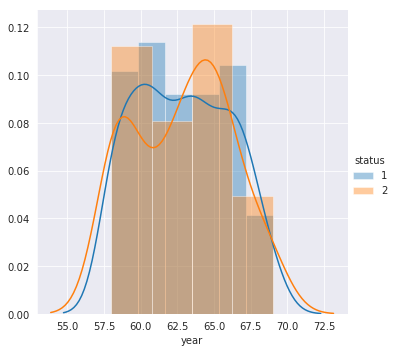

In [9]:
plt.close();
wa.filterwarnings("ignore") #imported Warning Library to supress the Warning
sn.set_style("darkgrid");
sn.FacetGrid(hm, hue="status", height=5)\
.map(sn.distplot, 'year')\
.add_legend()
plt.show()

Observation:
    People who undergoes surgery in year 60 to 61 had high survived rate. But again at the year 65 to 66 its reduce. 

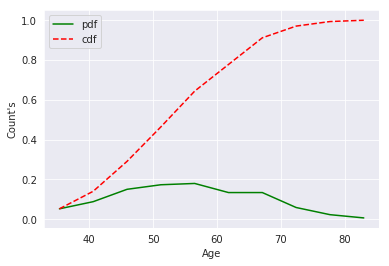

In [17]:
#Plot CDF and PDF for Age
counts, bins_edges = np.histogram(hm['age'], bins=10, density= True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bins_edges);
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:],pdf, 'g-', label='pdf')
plt.plot(bins_edges[1:],cdf, 'r--', label='cdf')
plt.ylabel("Count's")
plt.xlabel("Age")
plt.legend()
plt.show()

Observation:
    1.80% of patients are less than or equal to 62 age limits.
    2.20% od patients are greater than or equal to 63 age limits.

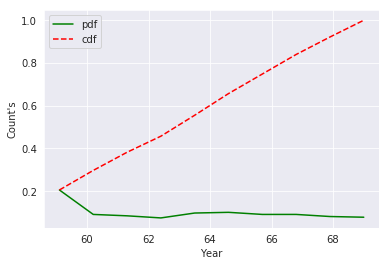

In [18]:
#Plot CDF and PDF for Year
counts, bins_edges = np.histogram(hm['year'], bins=10, density= True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bins_edges);
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:],pdf, 'g-', label='pdf')
plt.plot(bins_edges[1:],cdf, 'r--', label='cdf')
plt.ylabel("Count's")
plt.xlabel("Year")
plt.legend()
plt.show()

Observation:
    1.20% of treatments were done before year 1960.
    2.80% of treatments were done after year 1961.

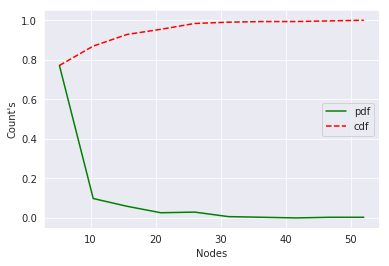

In [19]:
#Plot CDF and PDF for Nodes
counts, bins_edges = np.histogram(hm['nodes'], bins=10, density= True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bins_edges);
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:],pdf, 'g-', label='pdf')
plt.plot(bins_edges[1:],cdf, 'r--', label='cdf')
plt.ylabel("Count's")
plt.xlabel("Nodes")
plt.legend()
plt.show()

Observation:
    1. 77% of patients having less than or equal to 5 nodes.
    2. 9% of patients having 6 to 9 nodes.
    3. 12% of patients having 10 to 19 nodes.
    4. 2% of patients having greater than 20 nodes.

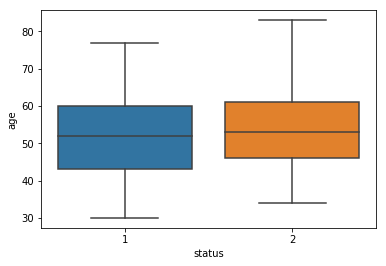

In [3]:
#Box Plot and Whiskers plots

sn.boxplot(x="status", y="age", data=hm)
plt.show()

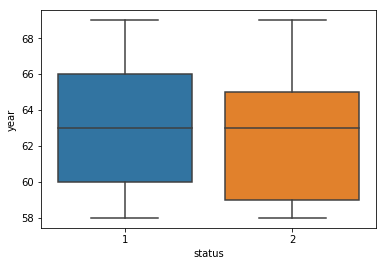

In [4]:
#Box Plot and Whiskers plots

sn.boxplot(x="status", y="year", data=hm)
plt.show()

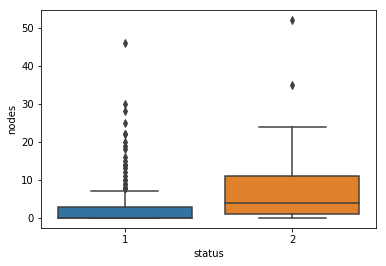

In [5]:
#Box Plot and Whiskers plots

sn.boxplot(x="status", y="nodes", data=hm)
plt.show()

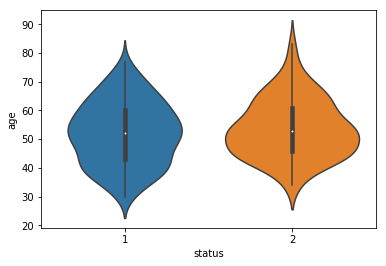

In [6]:
#Violin Plot
sn.violinplot(x="status", y="age", data=hm, size=5)
plt.show()

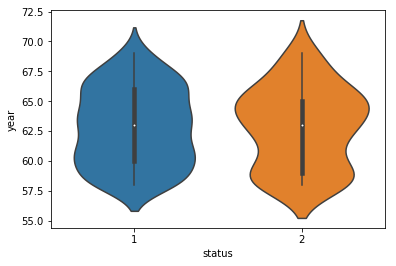

In [7]:
#Violin Plot
sn.violinplot(x="status", y="year", data=hm, size=5)
plt.show()

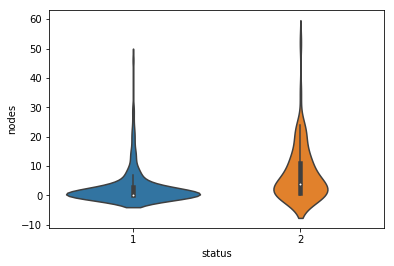

In [8]:
#Violin Plot
sn.violinplot(x="status", y="nodes", data=hm, size=5)
plt.show()

Observation from Box plot and Violin plot:
1. Age vs Status: People who is having less than 40 age survived more than 5years, at the same time people who's age greater than 52 have very less chance of survive.
2. Year vs Status: People who got treatment in year 1962 have survived more than 5year.
In both the plots status 1 and 2 are coincide over each other.
3. Nodes vs Status: People who having less than equal to 3 nodes having chance of survive more than 5 years.

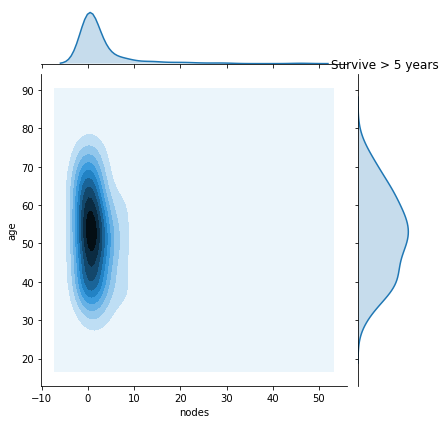

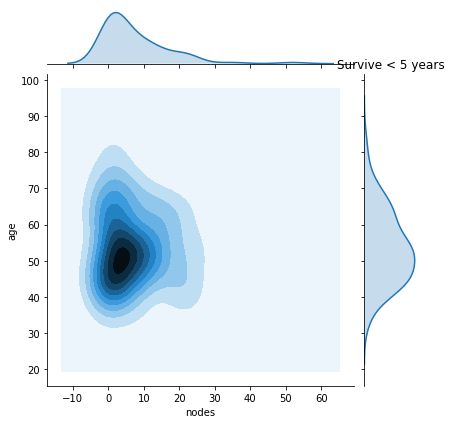

In [4]:
#Multivariate probability density, contour plot
#Seperating the dataset based on status
s1=hm.loc[hm["status"]==1];
s2=hm.loc[hm["status"]==2];
#Contour plot
sn.jointplot(x="nodes", y="age", data=s1, kind="kde");
plt.title("Survive > 5 years")
plt.show();
sn.jointplot(x="nodes", y="age", data=s2, kind="kde");
plt.title("Survive < 5 years")
plt.show();

Observation:
    1. Patient have high probablity of survive greater than 5 years if there node is less than 3 and their age is 49 to 65.
    2. Patient have very low probablity of survive greater than 5 years if node is more than 3 and their age is 49 to 51.

Conclusion:
    From all the above analysis,age and nodes have more information to determine the patient survival greater than 5 years. Nodes and survival rate are directly proportional.

Reference:
Nodes - https://en.wikipedia.org/wiki/Positive_axillary_lymph_node
        https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
        https://docs.python.org/3/library/warnings.html
        https://seaborn.pydata.org/generated/seaborn.pairplot.html
        https://seaborn.pydata.org/generated/seaborn.FacetGrid.html